In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_train[0].shape, y_train[0].shape

((28, 28), ())

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [6]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [7]:
X_train[0].shape, y_train[0].shape

((28, 28, 1), ())

In [8]:
# Scaling
xmax = X_train.max()
X_train = X_train / xmax
X_test = X_test / xmax

In [23]:
# model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28, 1)),

    tf.keras.layers.Conv2D(8, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(.2),

    tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(.5),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dropout(.5),

    tf.keras.layers.Dense(10, activation="softmax"),
])

model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy",]
)

batch_size = 512
epochs = 200

history_1 = model_1.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(X_test, y_test),
)

In [24]:
score = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Test loss : {score[0]:4.4f}")
print(f"Test accuracy : {score[1]:4.4f}")

Test loss : 0.2619
Test accuracy : 0.9051


In [25]:
df_model1 = pd.DataFrame(history_1.history)
df_model1.head()

,loss,accuracy,val_loss,val_accuracy
0,1.263903,0.540233,0.707677,0.7423
1,0.746392,0.719267,0.596540,0.7713
2,0.653524,0.753133,0.553453,0.7886
3,0.610780,0.768917,0.512381,0.8039
4,0.575981,0.783383,0.488851,0.8191


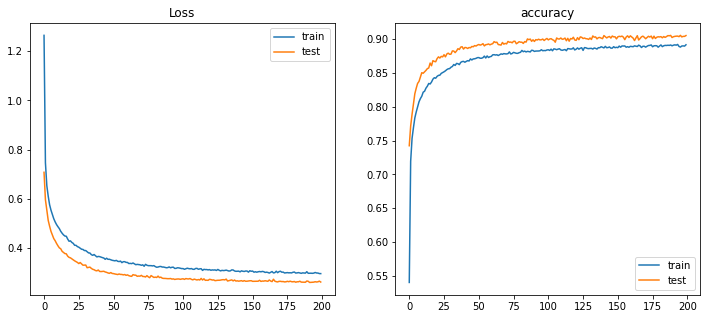

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(df_model1)), df_model1.loss, label="train")
plt.plot(range(len(df_model1)), df_model1.val_loss, label="test")
plt.title("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(len(df_model1)), df_model1.accuracy, label="train")
plt.plot(range(len(df_model1)), df_model1.val_accuracy, label="test")
plt.title("accuracy")
plt.legend()
plt.show()

In [31]:
y_softmax = model_1.predict(X_test, verbose=0)
y_preds = np.argmax(y_softmax, axis=-1)

In [32]:
y_preds

array([9, 2, 1, ..., 8, 1, 5])

In [33]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
cm

array([[865,   1,  18,  23,   4,   2,  82,   0,   5,   0],
       [  0, 973,   1,  17,   3,   0,   4,   0,   2,   0],
       [ 13,   0, 846,  11,  59,   0,  69,   0,   2,   0],
       [  9,   5,   9, 907,  33,   0,  35,   0,   2,   0],
       [  0,   0,  19,  28, 883,   0,  70,   0,   0,   0],
       [  0,   0,   0,   0,   0, 965,   0,  29,   0,   6],
       [119,   1,  55,  28,  79,   0, 707,   0,  11,   0],
       [  0,   0,   0,   0,   0,   5,   0, 979,   0,  16],
       [  1,   1,   6,   1,   4,   2,   4,   3, 976,   2],
       [  0,   0,   0,   0,   0,   5,   1,  44,   0, 950]])